# Explorative Analysis

------------------------------------------------------------------

## Table of Contents

<html>

1. Introduction 

    - Business Objective
    
    - Quick Technical links

2. Data Wrangling
    
     - Identified data quality issues 
      
     - Cleaning & Preprocessing with SKlearn pipelines
    

3. Research Questions

4. Analysis

    - Research Question 1

    - Research Question 2

    - Research Question 3
    
    - Research Question 4
    
5. General Observations and Recommendations

6. Limitations and Conclusions

7. References


</html>
___________________________________________________________________________________________________________
___________________________________________________________________________________________________________

### 1. Introduction

Business Objective

The finance team at Rossmann Pharmaceuticals is interested in forecasting sales in all their stores across several cities six weeks ahead of time. 
Managers in individual stores rely on their years of experience as well as their personal judgement to forecast sales.

The data team identified factors such as promotions, competition, school and state holidays,seasonality, and locality as necessary for predicting the sales across the various stores.

The aim of this analytical solution is to build and serve an end-to-end product that delivers this prediction to Analysts in the finance team.


Quick Technical links
- [notebooktoall docs](https://notebooktoall.readthedocs.io/en/latest/index.html)
- [jupyter notebook to web app](https://discourse.jupyter.org/t/how-to-transform-a-jupyter-notebook-into-a-webapp/758/4)

### 2. Data Wrangling

> import libraries

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#convert .ipynb notes to scripts
import notebooktoall as nb

#preprocessing libraries
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer

> import datasets

In [5]:
store = pd.read_csv('../../datasets/rossmann-store-sales/store.csv')
test = pd.read_csv('../../datasets/rossmann-store-sales/test.csv')
train = pd.read_csv('../../datasets/rossmann-store-sales/train.csv')

/home/patrick/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [7]:
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [8]:
test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


> Identify data quality and structural issues in datasets

store data


In [9]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [10]:
store.duplicated().any()

False

In [11]:
store.isna().any()

Store                        False
StoreType                    False
Assortment                   False
CompetitionDistance           True
CompetitionOpenSinceMonth     True
CompetitionOpenSinceYear      True
Promo2                       False
Promo2SinceWeek               True
Promo2SinceYear               True
PromoInterval                 True
dtype: bool

In [12]:
store.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

train data

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [14]:
train.duplicated().any()

False



no duplicate rows

In [15]:
train.isna().any()

Store            False
DayOfWeek        False
Date             False
Sales            False
Customers        False
Open             False
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool

no null values

test

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [17]:
test.duplicated().any()

False

In [18]:
test.isna().any()

Id               False
Store            False
DayOfWeek        False
Date             False
Open              True
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool

In [19]:
test.isna().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

> Check for outlier values in each datasets using the IQR

- I would define a function to do that

In [20]:
def outlier_vars(data, show_plot=False):
    outliers = []
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    num_data = data.select_dtypes(include='number')
    result = dict ((((num_data < (Q1 - 1.5 * IQR)) | (num_data > (Q3 + 1.5 * IQR)))==True).any())
    for k,v in result.items():
        if v == True:
            outliers.append(k)
    if show_plot:
        pair_plot = sns.pairplot(data[outliers]);
        print(f'{result},\n\n Visualization of outlier columns')
        return pair_plot
    else:
        return data[outliers]

outliers in store

{'Store': False, 'CompetitionDistance': True, 'CompetitionOpenSinceMonth': False, 'CompetitionOpenSinceYear': True, 'Promo2': False, 'Promo2SinceWeek': False, 'Promo2SinceYear': False},

 Visualization of outlier columns


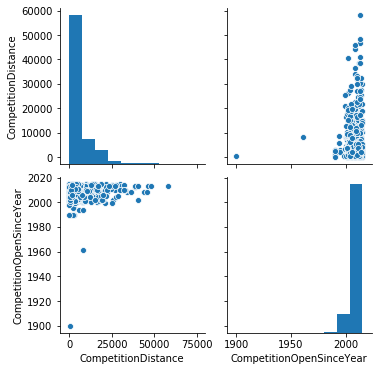

In [21]:
outlier_vars(store, show_plot=True)

outliers in train

{'Store': False, 'DayOfWeek': False, 'Sales': True, 'Customers': True, 'Open': True, 'Promo': False, 'SchoolHoliday': True},

 Visualization of outlier columns


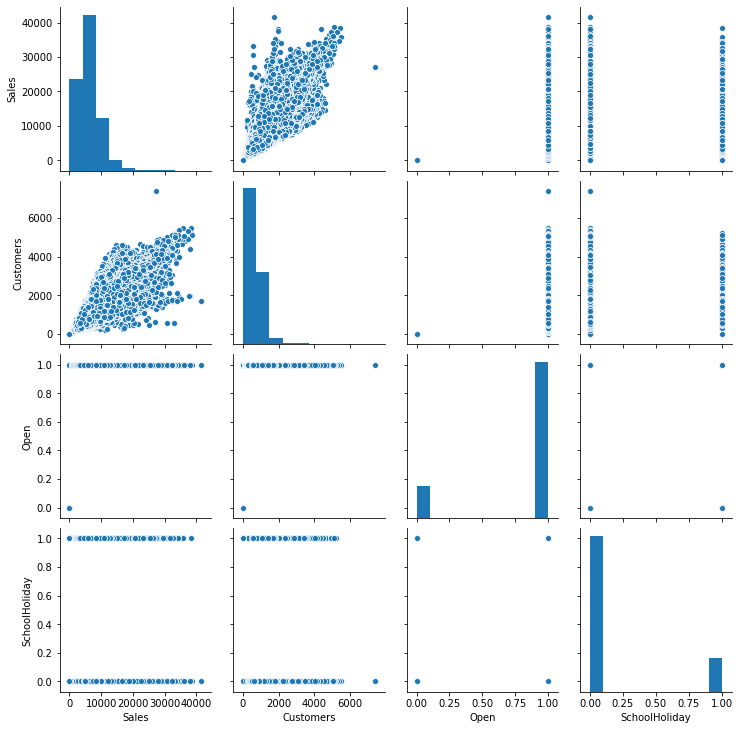

In [21]:
outlier_vars(train, show_plot=True)

outliers in test

{'Id': False, 'Store': False, 'DayOfWeek': False, 'Open': True, 'Promo': False, 'SchoolHoliday': False},

 Visualization of outlier columns


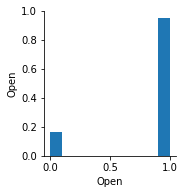

In [22]:
outlier_vars(test, show_plot=True)

#### Identified data quality Issues

- incorrect data types for dates in our columns

- missing values in some columns in store and test data

- outlier values in among the datasets


#### Cleaning & Preprocessing with SKlearn pipelines

> create copies of data

In [22]:
clean_store = store.copy()
clean_test = test.copy()
clean_train = train.copy()

> Fix incorrect datatypes

In [23]:
clean_train.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1


In [24]:
clean_train.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [25]:
clean_train.Date = pd.to_datetime(clean_train.Date)

In [26]:
clean_train.StateHoliday.value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

> combine the `0` values together

In [27]:
clean_train.StateHoliday = clean_train.StateHoliday.str.strip()

In [28]:
clean_train.StateHoliday.value_counts()

0    855087
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [29]:
clean_test.head(2)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0


In [30]:
clean_test.dtypes

Id                 int64
Store              int64
DayOfWeek          int64
Date              object
Open             float64
Promo              int64
StateHoliday      object
SchoolHoliday      int64
dtype: object

In [31]:
clean_test.Date = pd.to_datetime(clean_test.Date)

In [32]:
clean_test.StateHoliday.value_counts()

0    40908
a      180
Name: StateHoliday, dtype: int64

test fixed issue

In [33]:
clean_test.dtypes

Id                        int64
Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Open                    float64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

In [34]:
clean_store.head(2)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


In [35]:
clean_store.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

> check values of object type columns

In [36]:
clean_store.StoreType.value_counts()

a    602
d    348
c    148
b     17
Name: StoreType, dtype: int64

In [37]:
clean_store.Assortment.value_counts()

a    593
c    513
b      9
Name: Assortment, dtype: int64

In [38]:
clean_store.PromoInterval.value_counts()

Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

In [39]:
# store.CompetitionOpenSinceMonth=store.CompetitionOpenSinceMonth.astype('int64')
# store.CompetitionOpenSinceYear=store.CompetitionOpenSinceYear.astype('int64')
# store.Promo2SinceWeek=store.Promo2SinceWeek.astype('int64')
# store.Promo2SinceYear=store.Promo2SinceYear.astype('int64')

In [40]:
def preprocess(data, to_drop=[]):
    
    """
    The preprocess function takes as primary argument the data 
    and peform the following stepwise transformations to it:
    
    1. impute missing values of numerical and categorical columns 
    using median and constant values respectively
    
    2. scales dataset using the RobustScaler (robust to outlier values present in this dataset)
    
    3. Encodes categorical values to numerical values
    """
    
    columns = data.columns.to_list()
    
    # split data to numeric vs categorical
    numeric_features = data.select_dtypes(include=[
        'int64', 'float64']).columns
    
    if len(to_drop) > 0:
        categorical_features = data.select_dtypes(include=[
        'object']).drop(to_drop, axis=1).columns
        print(categorical_features)
    else: 
        categorical_features = data.select_dtypes(include=[
        'object']).columns
        
    categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing'))])
    
    numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
    ])
    # missing_values = np.nan
    
# Bundle preprocessing for numerical and categorical data
    preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

    my_pipeline = Pipeline(steps=[('preprocessor', preprocessor) ])
    
    for col in to_drop:
        columns.remove(col)
    print('Hello')
    
    trans_data = my_pipeline.fit_transform(data)
    return trans_data#pd.DataFrame(#, columns=columns) 

> merge test and train data

In [41]:
clean_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


### 3. Research Questions

#### Research Question 1:

`How does seasonality affect sales and customer behaviours ?`

-    Check for seasonality in both training and test sets - are the seasons similar between these two groups?
    
-    Check & compare sales behavior before, during and after holidays

#### Research Question 2:

`What factors are responsible for growth or fall in sales ?`

- What can you say about the correlation between sales and number ofcustomers?

- How does promo affect sales? Are the promos attracting morecustomers? How does it affect already existing customers?

- Could the promos be deployed in more effective ways? Which storesshould promos be deployed in?

- Check how the assortment type affects sales

#### Research Question 3:

`How does stores opening and closure affect customer behaviour in relation to sales ?`

- Trends of customer behavior during store open and closing times

- Which stores are opened on all weekdays? How does that affect theirsales on weekends?


#### Research Question 4:

`How does competitor activity and proximity affect sales ?`

-  How does the distance to the next competitor affect sales? What if thestore and its competitors all happen to be in city centres, does thedistance matter in that case?

- How does the opening or reopening of new competitors affect stores?Check for stores with NA as competitor distance but later on hasvalues for competitor distance

### 4. Analysis

#### Research Question 1


`How does seasonality affect sales and customer behaviours ?`

-    Check for seasonality in both training and test sets - are the seasons similar between these two groups?
    
-    Check & compare sales behavior before, during and after holidays

In [50]:
time_series = clean_train[['Date', 'Sales']]

In [51]:
time_series=time_series.set_index('Date')

In [52]:
time_series.index = pd.to_datetime(time_series.index)

In [53]:
time_series_day = time_series.resample('D').mean()

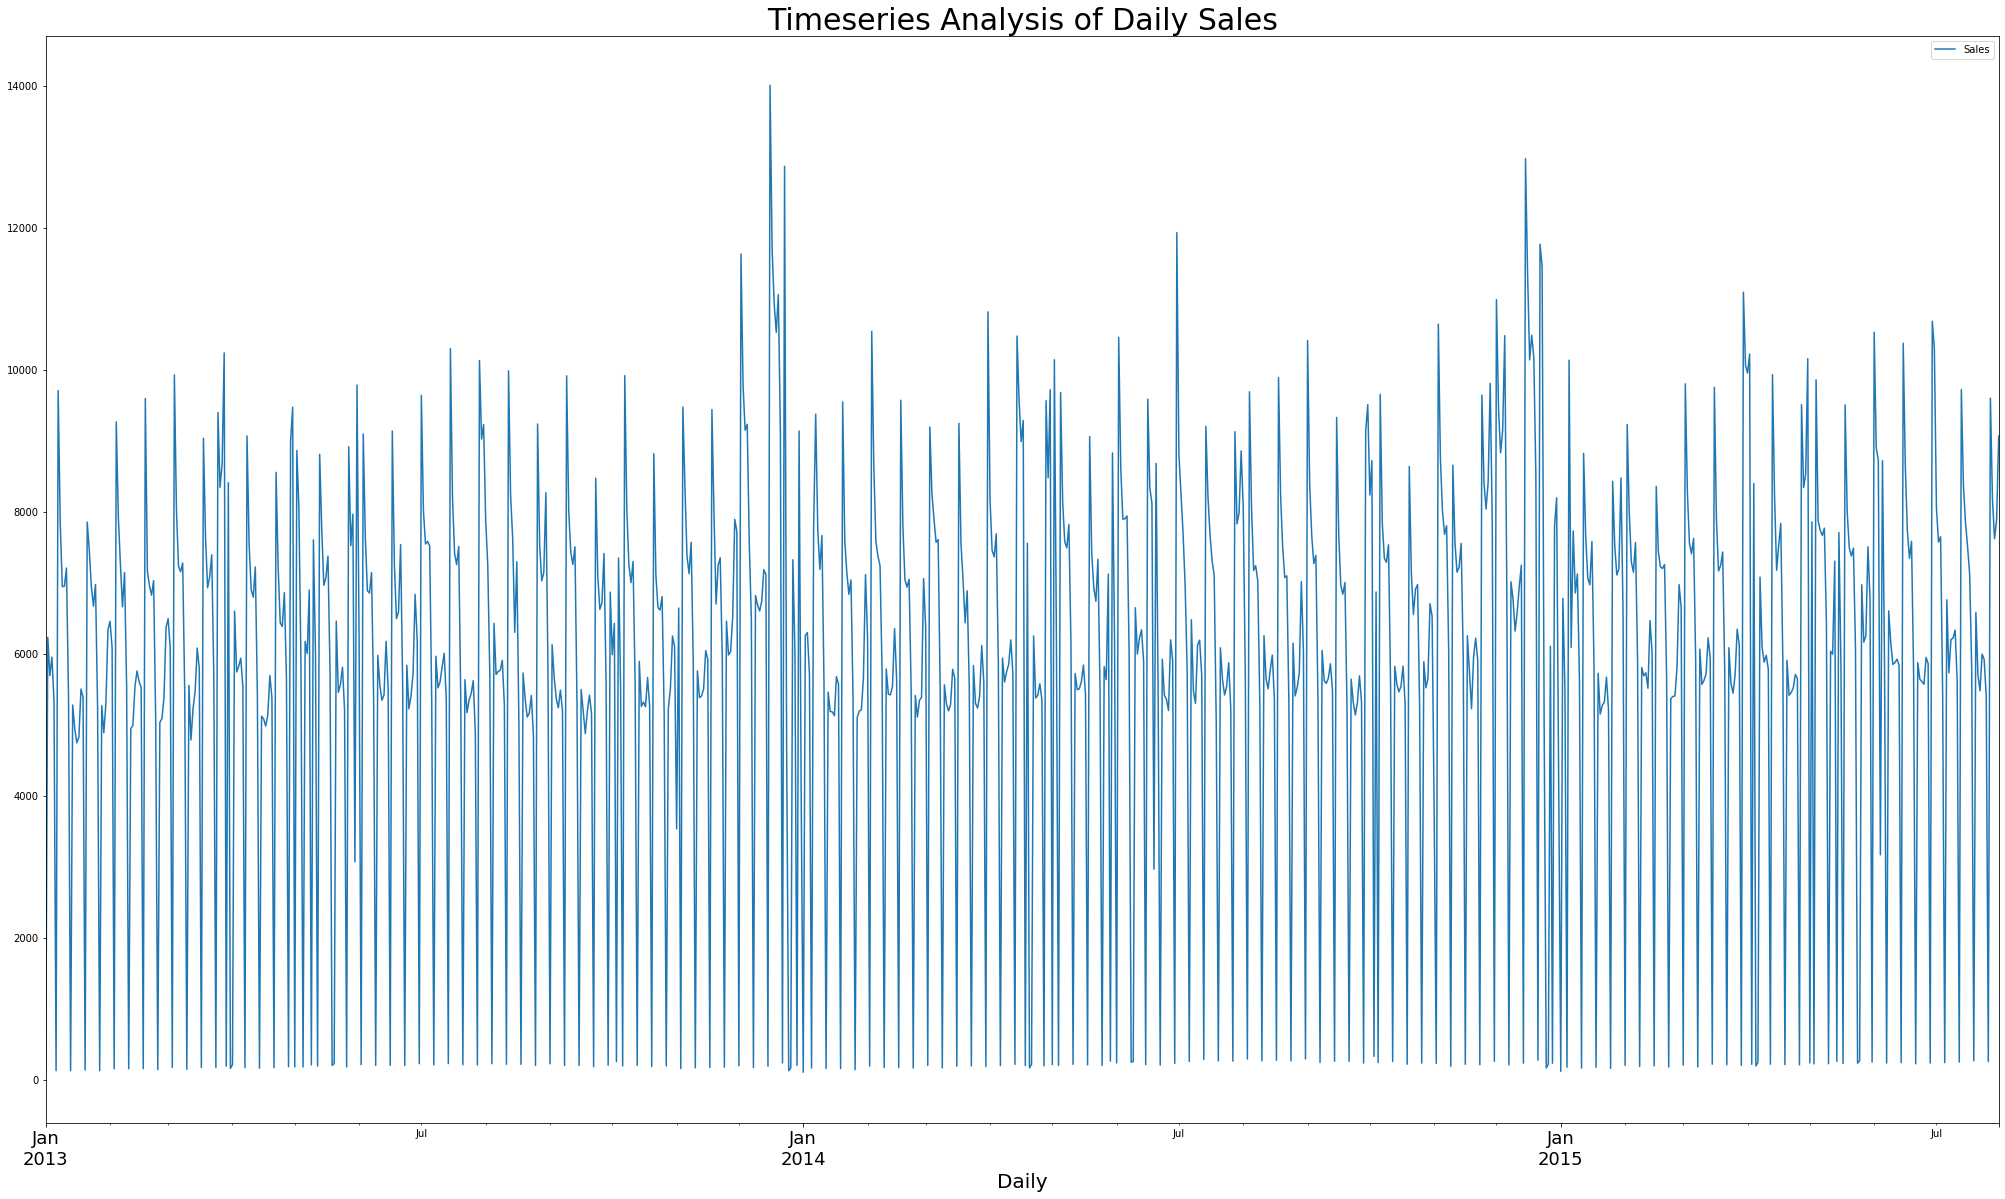

In [56]:
time_series_day.plot(figsize=(35,20))
plt.xlabel('Daily',fontsize=20)
plt.xticks(fontsize=18)
plt.title('Timeseries Analysis of Daily Sales', fontsize=30)
plt.savefig(fname='../../visuals/timeseries/tms_day.png', format='png')

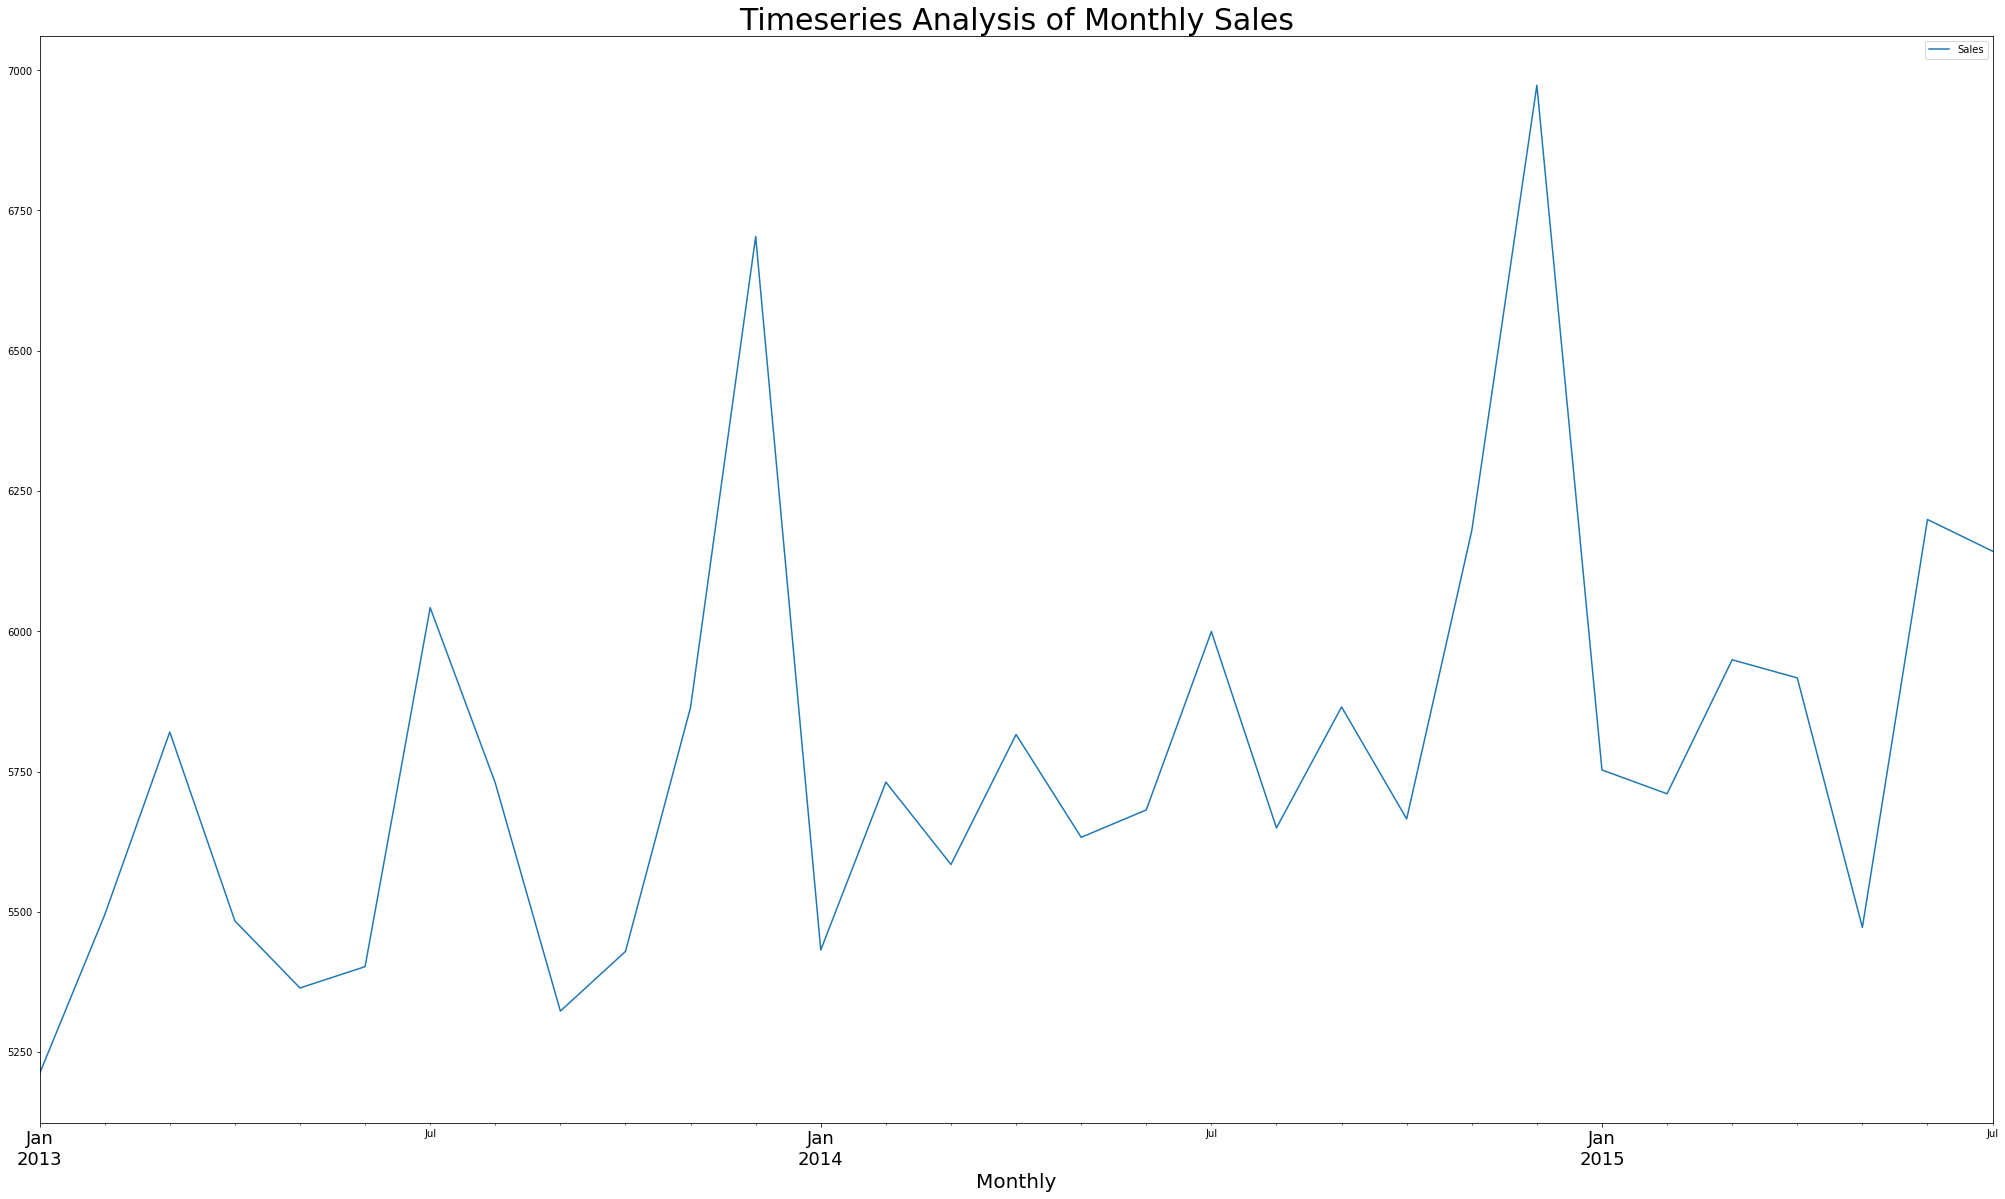

In [57]:
time_series_month = time_series.resample('M').mean()
time_series_month.plot(figsize=(35,20))
plt.xlabel('Monthly',fontsize=20)
plt.xticks(fontsize=18)
plt.title('Timeseries Analysis of Monthly Sales', fontsize=30)
plt.savefig(fname='../../visuals/timeseries/tms_month.png', format='png')

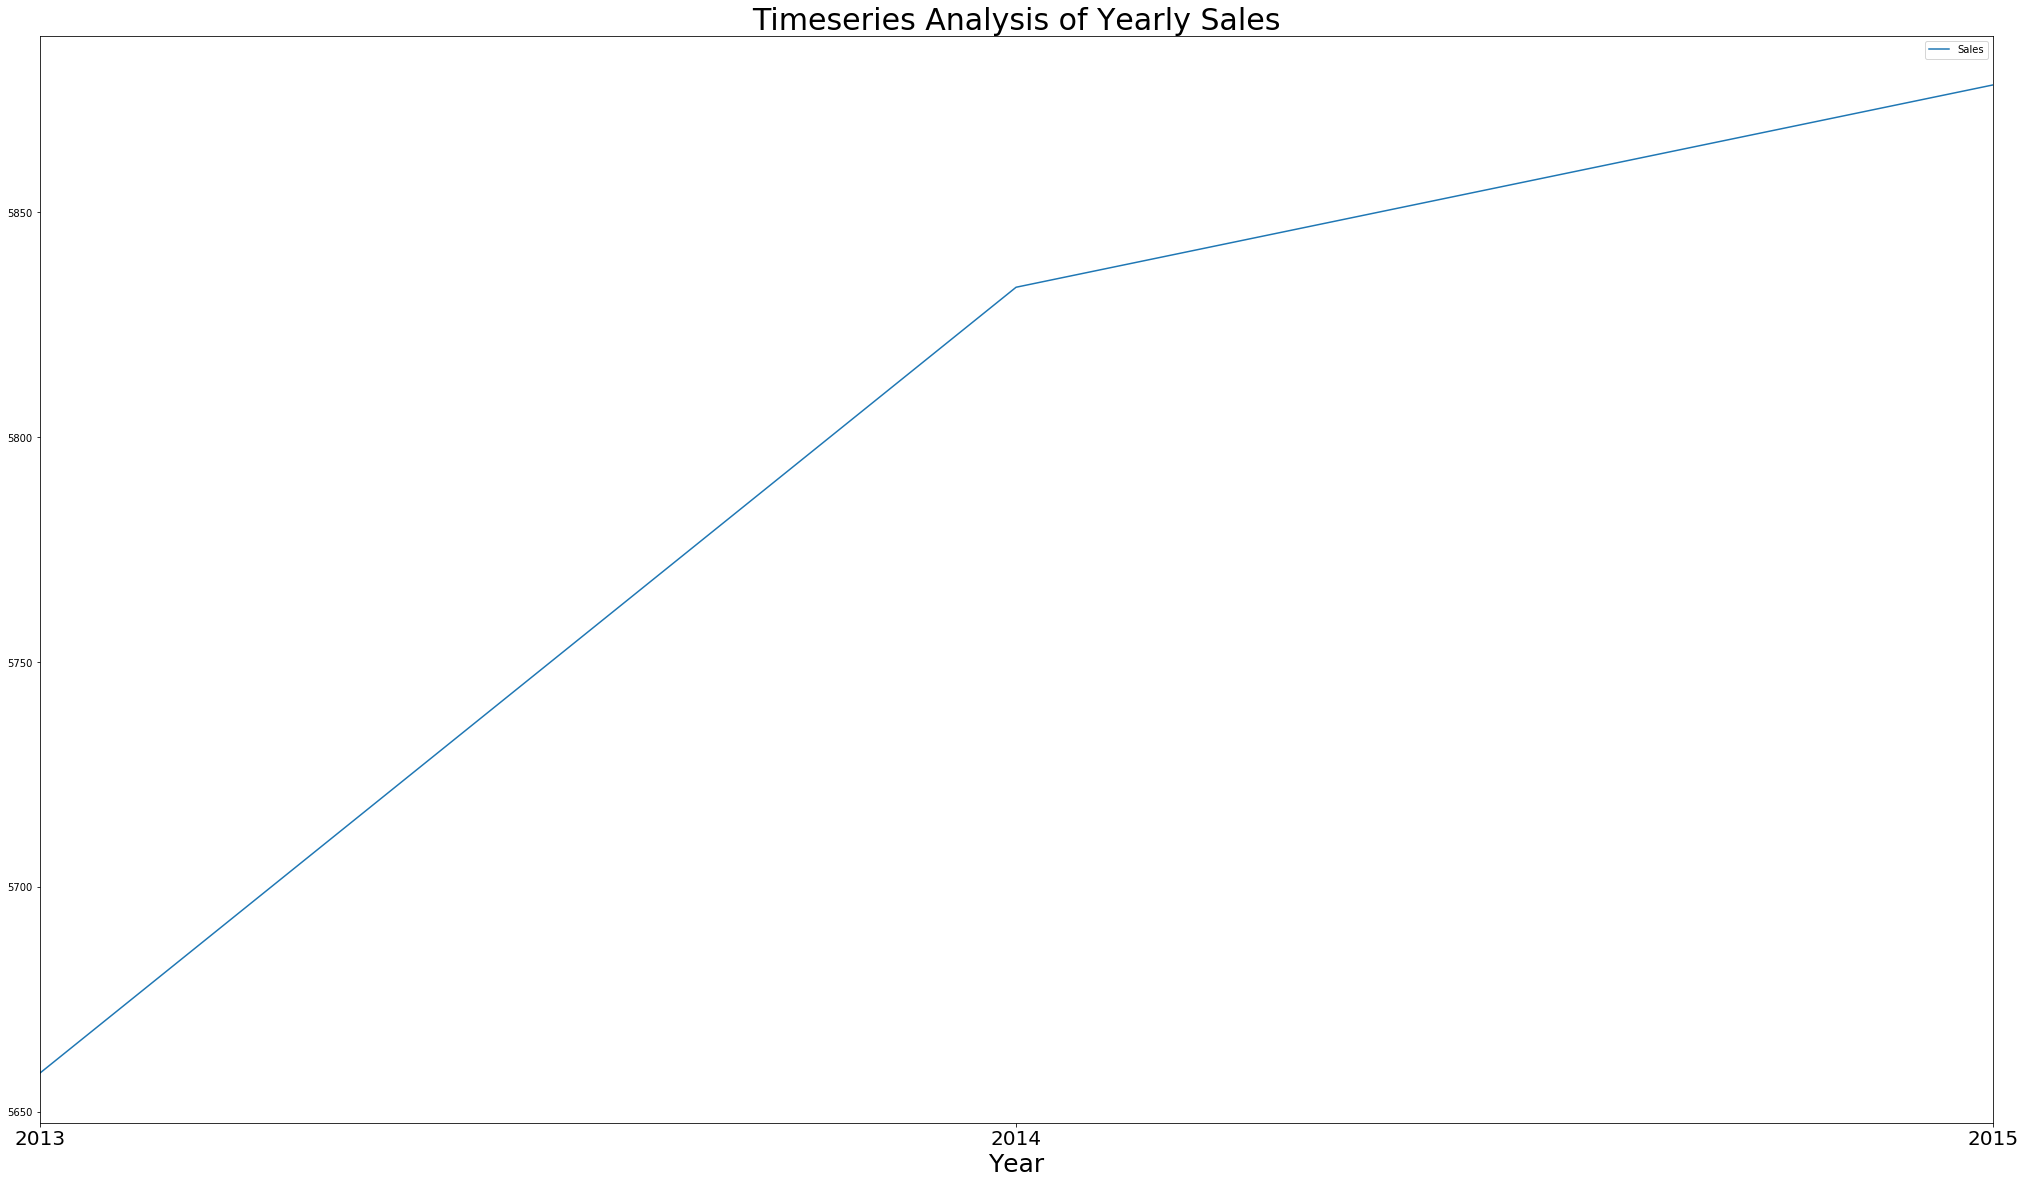

In [59]:
time_series_year = time_series.resample('Y').mean()
time_series_year.plot(figsize=(35,20))
plt.xlabel('Year',fontsize=25)
plt.xticks(fontsize=20)
plt.title('Timeseries Analysis of Yearly Sales', fontsize=30)
plt.savefig(fname='../../visuals/timeseries/tms_year.png', format='png')

In [49]:
# clean_test.merge(clean_train,on='Store', how='inner')

#### Research Question 2:

`What factors are responsible for growth or fall in sales ?`

- What can you say about the correlation between sales and number ofcustomers?

- How does promo affect sales? Are the promos attracting morecustomers? How does it affect already existing customers?

- Could the promos be deployed in more effective ways? Which storesshould promos be deployed in?

- Check how the assortment type affects sales

In [64]:
sales_cust = train[['Sales', 'Customers']]
sales_cust 

,Sales,Customers
0,5263,555
1,6064,625
2,8314,821
3,13995,1498
4,4822,559
...,...,...
1017204,0,0
1017205,0,0
1017206,0,0
1017207,0,0


In [65]:
corr_sales_cust = sales_cust.corr()

In [ ]:
sns.regplot(data=sales_cust, x='Customers', y='Sales')